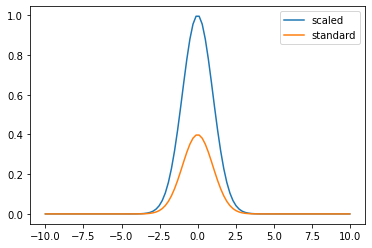

In [1]:
import numpy as np 
from math import exp, sqrt, pi
import matplotlib.pyplot as plt 

standardGaussian = lambda x : exp(-(1/2)*((x)**2))/(sqrt(2*pi))
scaledGaussian = lambda x : exp(-(1/2)*(x**2))

x = np.linspace(-10,10 , num=100)
scaled_y = [scaledGaussian(x_) for x_ in x]
standard_y = [standardGaussian(x_) for x_ in x]
plt.plot(x,scaled_y , label = 'scaled')
plt.plot(x, standard_y, label='standard')
plt.legend()


In [14]:
import cv2 
import numpy as np 
from itertools import permutations

standardGaussian = lambda x : exp(-(1/2)*((x)**2))/(sqrt(2*pi))
scaledGaussian = lambda x : exp(-(1/2)*(x**2))


def l2_norm_(x1, x2=np.array([img_size/2 , img_size/2])):
    return np.linalg.norm(x1-x2)
    

img_size = 11
center = img_size/2
isotropic_Gray_Image = np.zeros((img_size, img_size), np.uint8)
for x in range(img_size):
    for y in range(img_size):
       isotropic_Gray_Image[x][y] = np.linalg.norm(np.array([x-center , y-center]))

print(isotropic_Gray_Image)



[[7 7 6 6 5 5 5 5 6 6 7]
 [7 6 5 5 4 4 4 4 5 5 6]
 [6 5 4 4 3 3 3 3 4 4 5]
 [6 5 4 3 2 2 2 2 3 4 5]
 [5 4 3 2 2 1 1 2 2 3 4]
 [5 4 3 2 1 0 0 1 2 3 4]
 [5 4 3 2 1 0 0 1 2 3 4]
 [5 4 3 2 2 1 1 2 2 3 4]
 [6 5 4 3 2 2 2 2 3 4 5]
 [6 5 4 4 3 3 3 3 4 4 5]
 [7 6 5 5 4 4 4 4 5 5 6]]


In [16]:
imgSize = 10
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

for i in range(imgSize):
  for j in range(imgSize):

    # find euclidian distance from center of image (imgSize/2,imgSize/2) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5

    distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
    distanceFromCenter = 2.5*distanceFromCenter/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

isotropicGrayscaleImage


array([[  0,   1,   3,   6,   9,  11,   9,   6,   3,   1],
       [  1,   4,  11,  20,  30,  34,  30,  20,  11,   4],
       [  3,  11,  26,  50,  73,  82,  73,  50,  26,  11],
       [  6,  20,  50,  93, 136, 154, 136,  93,  50,  20],
       [  9,  30,  73, 136, 198, 225, 198, 136,  73,  30],
       [ 11,  34,  82, 154, 225, 255, 225, 154,  82,  34],
       [  9,  30,  73, 136, 198, 225, 198, 136,  73,  30],
       [  6,  20,  50,  93, 136, 154, 136,  93,  50,  20],
       [  3,  11,  26,  50,  73,  82,  73,  50,  26,  11],
       [  1,   4,  11,  20,  30,  34,  30,  20,  11,   4]], dtype=uint8)

In [10]:
import cv2
import numpy as np
from math import exp

# Probability as a function of distance from the center derived
# from a gaussian distribution with mean = 0 and stdv = 1
scaledGaussian = lambda x : exp(-(1/2)*(x**2))


imgSize = 512
isotropicGrayscaleImage = np.zeros((imgSize,imgSize),np.uint8)

for i in range(imgSize):
  for j in range(imgSize):

    # find euclidian distance from center of image (imgSize/2,imgSize/2) 
    # and scale it to range of 0 to 2.5 as scaled Gaussian
    # returns highest probability for x=0 and approximately
    # zero probability for x > 2.5

    distanceFromCenter = np.linalg.norm(np.array([i-imgSize/2,j-imgSize/2]))
    distanceFromCenter = 2.5*distanceFromCenter/(imgSize/2)
    scaledGaussianProb = scaledGaussian(distanceFromCenter)
    isotropicGrayscaleImage[i,j] = np.clip(scaledGaussianProb*255,0,255)

# Convert Grayscale to HeatMap Using Opencv
isotropicGaussianHeatmapImage = cv2.applyColorMap(isotropicGrayscaleImage, 
                                                  cv2.COLORMAP_JET)

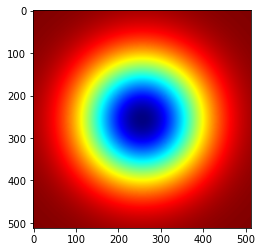

In [11]:
plt.imshow(isotropicGaussianHeatmapImage )